In [1]:
### import the data for a linear regression model 
### with multiple variables 
### try to predict oxygen with temperature and salinity 

### Part 1 same as in ex1a, except add tmperature 
#uncomment lines with a single "#" to see the output
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#####   PART 1: IMPORT, SORT and FILTER DATA #####
###import data and convert dates to datetime format
df=pd.read_csv('WaterQualityWaterQualityStation.csv')
df['SampleDate']=pd.to_datetime(df.SampleDate)
#df.SampleDate.head()
###sort by ascending sample date
df=df.sort_values(by=['SampleDate','Depth'])
###filter to only use july samples in the analysis 
df_filtered=df.query('SampleDate.dt.month==7')
###keep oxygen and salinity 
oxygen_df=df_filtered[df_filtered['Parameter'].str.match('DO')]
salt_df=df_filtered[df_filtered['Parameter'].str.match('SALINITY')]
temp_df=df_filtered[df_filtered['Parameter'].str.match('WTEMP')]
###check that the sample dates and depths match up 
o2_list = oxygen_df[['SampleDate','Depth']]
salt_list = salt_df[['SampleDate','Depth']]
temp_list = temp_df[['SampleDate','Depth']]
#check=(o2_list.reset_index()==salt_list.reset_index())
#check.SampleDate.value_counts(),check.Depth.value_counts()
#check=(o2_list.reset_index()==temp_list.reset_index())
#check.SampleDate.value_counts(),check.Depth.value_counts()
###keep just the values
oxygen=oxygen_df.MeasureValue.to_numpy()
salt=salt_df.MeasureValue.to_numpy()
temp=temp_df.MeasureValue.to_numpy()
salt.shape, oxygen.shape, temp.shape 

((155,), (155,), (155,))

In [2]:
### first ten examples
### X includes salt and temp, y is oxygen 
print('First 10 examples from the dataset: \n')
print(np.column_stack([salt[:10],temp[:10],oxygen[:10]]))

First 10 examples from the dataset: 

[[ 9.2  26.1   8.5 ]
 [ 9.2  25.6   8.4 ]
 [ 9.2  25.6   8.3 ]
 [ 9.27 25.6   8.  ]
 [ 9.53 25.7   7.8 ]
 [10.3  25.9   7.6 ]
 [10.37 25.9   7.6 ]
 [10.37 25.9   7.6 ]
 [11.08 25.9   6.9 ]
 [11.21 25.8   6.7 ]]


In [3]:
#####   PART 2: FEATURE NORMALIZATION #####
### Scale features and set them to zero mean
m=oxygen.size
X=np.column_stack([salt,temp])
y=oxygen
mu=np.mean(X,axis=0)
sigma=np.std(X,axis=0)
X_norm=(X-np.tile(mu,(m,1)))/np.tile(mu,(m,1)) 

### Add intercept term to X
X = np.column_stack((np.ones(m),X_norm)) 

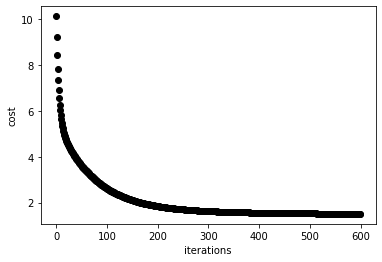

Theta computed from gradient descent: 

[  3.34948387 -10.09460184   4.46426167]
Predicted oxygen concentration with S=15, T=25 (using gradient descent):
 14.916919240571277


In [4]:
#####   PART 3: GRADIENT DESCENT #####
### choose some alpha value, init theta
alpha = 0.1
num_iters = 600
theta = np.zeros(X[1].size)

### build the cost function. same as in ex 1a. 
def computeCost(X, y, theta):
    var=np.zeros(y.size)
    for i in range(0,y.size):
        var[i]=(np.dot(theta.T,X[i,:])-y[i])**2  
    return (1/(2*m))*np.sum(var)

### build the gradient descent function 
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    J_history=np.zeros(num_iters)
    var1=np.zeros(y.size)
    var2=np.zeros(theta.size)
    for num_iters in range (0,num_iters):
        var1=np.sum(np.tile(theta,(y.size,1))*X,axis=1)-y 
        for i in range (0,theta.size):
            var2[i]=np.sum(var1*X[:,i]) 
        theta=theta-alpha*(1/m)*var2
        J_history[num_iters]=computeCost(X, y, theta)
    return theta, J_history

### run the gradient descent algorithm and save out cost history 
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters)

### plot the cost function history 
plt.plot(np.arange(0,num_iters),J_history,'ko')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

### Display gradient descent's result
print('Theta computed from gradient descent: \n')
print(theta)

### Estimate the oxygen concentration for 
### salinity=10, temperature=25
### Recall that the first column of X is all ones 
### Thus, it does not need to be normalized.
o2 = theta[0] + theta[1]*((10-mu[0])/sigma[0]) + theta[2]*((25-mu[1])/sigma[1])

print('Predicted oxygen concentration with S=15, T=25 \
(using gradient descent):\n', o2)

In [5]:
#####   PART 4: NORMAL EQUATIONS #####

### Calculate the parameters from the normal equation 
### define the normal equation 
theta = np.zeros(X[1].size)
def normalEqn(X, y):
    theta=np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@y
    return theta

theta = normalEqn(X, y)

### Display normal equation's result
print('Theta computed from the normal equations: \n')
print(theta)

### Estimate the oxygen concentration for 
### salinity=10, temperature=25
o2 = theta[0] + theta[1]*((10-mu[0])/sigma[0]) + theta[2]*((25-mu[1])/sigma[1])

print('Predicted oxygen concentration with S=15, T=25 \
(using gradient descent):\n', o2)

Theta computed from the normal equations: 

[ 3.34948387 -7.25145359 22.18016229]
Predicted oxygen concentration with S=15, T=25 (using gradient descent):
 9.333818427654082
